#**Project Title: European Airbnb Price Prediction**

###<center> Team members: Anqi Chen, Sirui Li, Jingyu Nie, Zhi Zhang, Dongze Zhao





###<center> 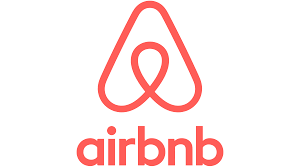





# **Problem We Solved**




*  Offer practical and valuable insights into Airbnb pricing in Europe through our analytical methodology.

*   Analyze current market trends and price levels, enabling homeowners in Europe to make informed decisions when listing their properties on Airbnb.

*   Assist homeowners in optimizing their pricing strategies and help potential real estate investors make wise investment decisions that maximize profits.


*   Guide individuals who are interested in investing in real estate with respect to housing configuration, ultimately contributing to the growth and success of the European Airbnb market.

# 1. Data Preparation



##### 1.1 Dataset We Used

* 21 columns including both independent variables that may potentially influence Airbnb prices in European cities, as well as the outcome variable indicating the price levels.

*  Airbnb prices records in Europe;

*  Dataset source: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

##### 1.2 Information (Variables) of Airbnb Prices in European Cities:



1. realSum > The total price of the Airbnb listing. (Numeric)
2. room_type > The type of room being offered (e.g. private, shared, etc.)(Categorical)
3. room_shared > Whether the room is shared or not. (Boolean)
4. room_private	> Whether the room is private or not. (Boolean)
5. person_capacity > The maximum number of people that can stay in the room. (Numeric)
6. host_is_superhost > Whether the host is a superhost or not. (Boolean)
7. multi > Whether the listing is for multiple rooms or not. (Boolean)
8. biz > Whether the listing is for business purposes or not. (Boolean)
9. cleanliness_rating > The cleanliness rating of the listing. (Numeric)
10. guest_satisfaction_overall > The overall guest satisfaction rating of the listing. (Numeric)
11. bedrooms > The number of bedrooms in the listing. (Numeric)
12. dist > The distance from the city centre. (Numeric)
13. metro_dist > The distance from the nearest metro station. (Numeric)
14. attr_index > attraction index of the listing location                
15. attr_index_norm > normalised attraction index (0-100)            
16. rest_index > restaurant index of the listing location                 
17. rest_index_norm > normalised restaurant index (0-100)
18. lng > The longitude of the listing. (Numeric)
19. lat	> The latitude of the listing. (Numeric)
20. city > the city where listings are located (Catergorical)
21. Weekend_dum > whether the booked date is weekend or not. (Numeric, 0=weekday, 1=weekend)

#### 1.3 Loading and exploring the final dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
paris_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/paris_weekdays.csv')
paris_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/paris_weekends.csv')
london_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/london_weekdays.csv')
london_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/london_weekends.csv')
amsterdam_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/amsterdam_weekdays.csv')
amsterdam_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/amsterdam_weekends.csv')
berlin_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/berlin_weekdays.csv')
berlin_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/berlin_weekends.csv')
vienna_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/vienna_weekdays.csv')
vienna_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/vienna_weekends.csv')
rome_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/rome_weekdays.csv')
rome_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/rome_weekends.csv')
athens_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/athens_weekdays.csv')
athens_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/athens_weekends.csv')
barcelona_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/barcelona_weekdays.csv')
barcelona_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/barcelona_weekends.csv')
budapest_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/budapest_weekdays.csv')
budapest_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/budapest_weekends.csv')
lisbon_weekdays_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/lisbon_weekdays.csv')
lisbon_weekends_df = pd.read_csv('/content/drive/Shareddrives/ba305/Airbnb_Raw_Data/lisbon_weekends.csv')

paris_weekdays_df['City'] = 'paris'
paris_weekends_df['City'] = 'paris'
london_weekdays_df['City'] = 'london'
london_weekends_df ['City'] = 'london'
amsterdam_weekdays_df['City'] = 'amsterdam'
amsterdam_weekends_df ['City'] = 'amsterdam'
berlin_weekdays_df['City'] = 'berlin'
berlin_weekends_df ['City'] = 'berlin'
vienna_weekdays_df['City'] = 'vienna'
vienna_weekends_df ['City'] = 'vienna'
rome_weekdays_df['City'] = 'rome'
rome_weekends_df ['City'] = 'rome'
athens_weekdays_df['City'] = 'athens'
athens_weekends_df ['City'] = 'athens'
barcelona_weekdays_df['City'] = 'barcelona'
barcelona_weekends_df ['City'] = 'barcelona'
budapest_weekdays_df['City'] = 'budapest'
budapest_weekends_df ['City'] = 'budapest'
lisbon_weekdays_df['City'] = 'lisbon'
lisbon_weekends_df ['City'] = 'lisbon'

paris_weekdays_df['Weekend_dum'] = 'False'
paris_weekends_df['Weekend_dum'] = 'True'
london_weekdays_df['Weekend_dum'] = 'False'
london_weekends_df['Weekend_dum'] = 'True'
amsterdam_weekdays_df['Weekend_dum'] = 'False'
amsterdam_weekends_df['Weekend_dum'] = 'True'
berlin_weekdays_df['Weekend_dum'] = 'False'
berlin_weekends_df['Weekend_dum'] = 'True'
vienna_weekdays_df['Weekend_dum'] = 'False'
vienna_weekends_df['Weekend_dum'] = 'True'
rome_weekdays_df['Weekend_dum'] = 'False'
rome_weekends_df['Weekend_dum'] = 'True'
athens_weekdays_df['Weekend_dum'] = 'False'
athens_weekends_df['Weekend_dum'] = 'True'
barcelona_weekdays_df['Weekend_dum'] = 'False'
barcelona_weekends_df['Weekend_dum'] = 'True'
budapest_weekdays_df['Weekend_dum'] = 'False'
budapest_weekends_df['Weekend_dum'] = 'True'
lisbon_weekdays_df['Weekend_dum'] = 'False'
lisbon_weekends_df['Weekend_dum'] = 'True'

df = pd.concat([paris_weekdays_df, paris_weekends_df, london_weekdays_df, london_weekends_df, amsterdam_weekdays_df, amsterdam_weekends_df, berlin_weekdays_df, berlin_weekends_df, vienna_weekdays_df, vienna_weekends_df, rome_weekdays_df, rome_weekends_df, athens_weekdays_df, athens_weekends_df, barcelona_weekdays_df, barcelona_weekends_df, budapest_weekdays_df, budapest_weekends_df, lisbon_weekdays_df, lisbon_weekends_df], axis=0, ignore_index=True)
df.head()

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  296.159940     Private room        False          True   
1           1  288.237487     Private room        False          True   
2           2  211.343089     Private room        False          True   
3           3  298.956100  Entire home/apt        False         False   
4           4  247.926181  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0               True      0    0                10.0  ...   
1              2.0               True      0    0                10.0  ...   
2              2.0              False      0    0                10.0  ...   
3              2.0              False      0    1                 9.0  ...   
4              4.0              False      0    0                 7.0  ...   

       dist  metro_dist  attr_index  attr_index_norm   rest_index  \
0  0.699821    0.193709  518.478947        25.239380  1218.662228   
1  2.100005    0.107221  873.216962        42.507907  1000.543327   
2  3.302325    0.234724  444.556077        21.640840   902.854467   
3  0.547567    0.195997  542.142014        26.391291  1199.184166   
4  1.197921    0.103573  406.928958        19.809165  1070.775497   

   rest_index_norm      lng       lat   City  Weekend_dum  
0        71.608028  2.35385  48.86282  paris        False  
1        58.791463  2.32436  48.85902  paris        False  
2        53.051310  2.31714  48.87475  paris        False  
3        70.463506  2.35600  48.86100  paris        False  
4        62.918272  2.35915  48.86648  paris        False  

[5 rows x 22 columns]

In [ ]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'Weekend_dum'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In this project, we chose "realSum" as our target variable to predict the prices of 51707 bookings from Airbnb in European Cities.

# 2. Descriptive Analysis

##### 2.1Distribution of Price (our target variable)

In [ ]:
import plotly.express as px


mean_price = df['realSum'].mean()
median_price = df['realSum'].median()


fig = px.histogram(df, x="realSum", labels={'G':'Price', 'y':'count'})


fig.add_vline(x=mean_price, line_color='red', line_dash='dash', name='Mean')
fig.add_vline(x=median_price, line_color='black', line_dash='dash', name='Median')


fig.update_layout(title_text='Distribution of Price', title_x=0.5)


fig.show()

In [ ]:
print("Original dataframe shape: ", df.shape)

Original dataframe shape:  (51707, 22)


##### 2.2 Identify outliers using the interquartile range (IQR) method

In [ ]:
import pandas as pd
import seaborn as sns

sns.boxplot(x=df['realSum'])


print(df['realSum'].describe())


q1 = df['realSum'].quantile(0.25)
q3 = df['realSum'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = df.loc[(df['realSum'] < lower_bound) | (df['realSum'] > upper_bound)]
print("Number of outliers found: ", len(outliers))

count    51707.000000
mean       279.879591
std        327.948386
min         34.779339
25%        148.752174
50%        211.343089
75%        319.694287
max      18545.450285
Name: realSum, dtype: float64
Number of outliers found:  3662


##### 2.3 Drop the outliers

In [ ]:
df = df.drop(df[(df['realSum'] < lower_bound) | (df['realSum'] > upper_bound)].index)
print("Filtered dataframe shape: ", df.shape)

Filtered dataframe shape:  (48045, 22)


##### 2.4 New Distribution of Price after we drop the outliers

In [ ]:
import plotly.express as px


mean_price = df['realSum'].mean()
median_price = df['realSum'].median()


fig = px.histogram(df, x="realSum", labels={'G':'Price', 'y':'count'})


fig.add_vline(x=mean_price, line_color='red', line_dash='dash', name='Mean')
fig.add_vline(x=median_price, line_color='black', line_dash='dash', name='Median')


fig.update_layout(title_text='Distribution of Price', title_x=0.5)


fig.show()



#### 2.5 Check if there is any missing data




In [ ]:

missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
City                          0
Weekend_dum                   0
dtype: int64


#### 2.6 Check if there is any duplicate

In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 0


#### 2.7 Visualize Airbnb Price Differences in European Cities on a Heatmap

In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap

locations = df[['lat', 'lng', 'realSum']]

map = folium.Map(location=[48.8566, 2.3522], zoom_start=11)

locations['weight'] = locations['realSum'] / locations['realSum'].max()

heat_map = HeatMap(locations[['lat', 'lng', 'weight']].values.tolist(), radius=15, max_zoom=13)

map.add_child(heat_map)

map

<ipython-input-66-57452d4cb266>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 3. Data Processing

### 3.1 Remove the unused information

In [ ]:
#Drop Unnamed: 0, lng, lat,room_shared, room_private, attr_index,rest_index columns
df = df.drop(columns=['Unnamed: 0', 'lng', 'lat', 'room_shared','room_private','attr_index','rest_index'])
df.head()

realSum        room_type  person_capacity  host_is_superhost  multi  \
0  296.159940     Private room              2.0               True      0   
1  288.237487     Private room              2.0               True      0   
2  211.343089     Private room              2.0              False      0   
3  298.956100  Entire home/apt              2.0              False      0   
4  247.926181  Entire home/apt              4.0              False      0   

   biz  cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
0    0                10.0                        97.0         1  0.699821   
1    0                10.0                        97.0         1  2.100005   
2    0                10.0                        94.0         1  3.302325   
3    1                 9.0                        91.0         1  0.547567   
4    0                 7.0                        82.0         1  1.197921   

   metro_dist  attr_index_norm  rest_index_norm   City Weekend_dum  
0    0.193709        25.239380        71.608028  paris       False  
1    0.107221        42.507907        58.791463  paris       False  
2    0.234724        21.640840        53.051310  paris       False  
3    0.195997        26.391291        70.463506  paris       False  
4    0.103573        19.809165        62.918272  paris       False

### 3.2 Find the object columns

In [ ]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']
print(object_cols)

['room_type', 'City', 'Weekend_dum']


### 3.3 Create dummy variables

In [ ]:
#Convert categorical variables to numerical variables
df = pd.get_dummies(df, prefix_sep='_', drop_first=False)
df.head()

realSum  person_capacity  host_is_superhost  multi  biz  \
0  296.159940              2.0               True      0    0   
1  288.237487              2.0               True      0    0   
2  211.343089              2.0              False      0    0   
3  298.956100              2.0              False      0    1   
4  247.926181              4.0              False      0    0   

   cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
0                10.0                        97.0         1  0.699821   
1                10.0                        97.0         1  2.100005   
2                10.0                        94.0         1  3.302325   
3                 9.0                        91.0         1  0.547567   
4                 7.0                        82.0         1  1.197921   

   metro_dist  ...  City_barcelona  City_berlin  City_budapest  City_lisbon  \
0    0.193709  ...               0            0              0            0   
1    0.107221  ...               0            0              0            0   
2    0.234724  ...               0            0              0            0   
3    0.195997  ...               0            0              0            0   
4    0.103573  ...               0            0              0            0   

   City_london  City_paris  City_rome  City_vienna  Weekend_dum_False  \
0            0           1          0            0                  1   
1            0           1          0            0                  1   
2            0           1          0            0                  1   
3            0           1          0            0                  1   
4            0           1          0            0                  1   

   Weekend_dum_True  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 27 columns]

In [ ]:
#change the true and false to 1 and 0
df['host_is_superhost'] = df['host_is_superhost'].astype(bool).astype(int)
df['host_is_superhost'] = df['host_is_superhost'].replace({'True': 1, 'False': 0})
df.head()

realSum  person_capacity  host_is_superhost  multi  biz  \
0  296.159940              2.0                  1      0    0   
1  288.237487              2.0                  1      0    0   
2  211.343089              2.0                  0      0    0   
3  298.956100              2.0                  0      0    1   
4  247.926181              4.0                  0      0    0   

   cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
0                10.0                        97.0         1  0.699821   
1                10.0                        97.0         1  2.100005   
2                10.0                        94.0         1  3.302325   
3                 9.0                        91.0         1  0.547567   
4                 7.0                        82.0         1  1.197921   

   metro_dist  ...  City_barcelona  City_berlin  City_budapest  City_lisbon  \
0    0.193709  ...               0            0              0            0   
1    0.107221  ...               0            0              0            0   
2    0.234724  ...               0            0              0            0   
3    0.195997  ...               0            0              0            0   
4    0.103573  ...               0            0              0            0   

   City_london  City_paris  City_rome  City_vienna  Weekend_dum_False  \
0            0           1          0            0                  1   
1            0           1          0            0                  1   
2            0           1          0            0                  1   
3            0           1          0            0                  1   
4            0           1          0            0                  1   

   Weekend_dum_True  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 27 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48045 entries, 0 to 51706
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     48045 non-null  float64
 1   person_capacity             48045 non-null  float64
 2   host_is_superhost           48045 non-null  int64  
 3   multi                       48045 non-null  int64  
 4   biz                         48045 non-null  int64  
 5   cleanliness_rating          48045 non-null  float64
 6   guest_satisfaction_overall  48045 non-null  float64
 7   bedrooms                    48045 non-null  int64  
 8   dist                        48045 non-null  float64
 9   metro_dist                  48045 non-null  float64
 10  attr_index_norm             48045 non-null  float64
 11  rest_index_norm             48045 non-null  float64
 12  room_type_Entire home/apt   48045 non-null  uint8  
 13  room_type_Private room      480

### 3.4 Correlation matrix to find the relationship among the variables

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), mask = mask, square = True, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap='YlGnBu', annot_kws={"size": 7})
plt.xticks(rotation=90)
plt.show()

<ipython-input-72-fcc066a82a40>:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



### 3.5 Define the feature matrix and target variable

In [ ]:
predictors = list(df.columns)
predictors.remove('realSum')

X = df[predictors]
y = df['realSum']

### 3.6 Split data into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### 3.7 Standarlize the data

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.8 PCA

In [ ]:
#Drop missing values
df = df.dropna(how='any')

#Reset the index after dropping empty rows
df = df.reset_index(drop=True)
df

corr_mat = df.corr()
corr_mat

realSum  person_capacity  host_is_superhost  \
realSum                     1.000000         0.248650          -0.068621   
person_capacity             0.248650         1.000000           0.047856   
host_is_superhost          -0.068621         0.047856           1.000000   
multi                      -0.079659        -0.048121           0.098641   
biz                         0.072983         0.096354          -0.106333   
cleanliness_rating         -0.012116         0.012259           0.280339   
guest_satisfaction_overall -0.037171         0.014032           0.287567   
bedrooms                    0.154350         0.530573           0.038290   
dist                       -0.059713        -0.135039          -0.057977   
metro_dist                 -0.087786        -0.025061          -0.004792   
attr_index_norm             0.400539        -0.130193          -0.088623   
rest_index_norm             0.268150         0.018609          -0.017005   
room_type_Entire home/apt   0.298302         0.489762           0.064643   
room_type_Private room     -0.287170        -0.499316          -0.059602   
room_type_Shared room      -0.068501         0.043470          -0.029571   
City_amsterdam              0.212889        -0.100223           0.018070   
City_athens                -0.260511         0.170113           0.133264   
City_barcelona              0.013138        -0.123134          -0.045421   
City_berlin                -0.028968        -0.068099          -0.002835   
City_budapest              -0.163409         0.107779           0.082130   
City_lisbon                 0.011734         0.070640          -0.039799   
City_london                 0.152715        -0.173517          -0.108132   
City_paris                  0.266305        -0.103220          -0.102331   
City_rome                  -0.130345         0.100230           0.070436   
City_vienna                -0.012892         0.056345           0.014754   
Weekend_dum_False          -0.035724         0.011898           0.006398   
Weekend_dum_True            0.035724        -0.011898          -0.006398   

                               multi       biz  cleanliness_rating  \
realSum                    -0.079659  0.072983           -0.012116   
person_capacity            -0.048121  0.096354            0.012259   
host_is_superhost           0.098641 -0.106333            0.280339   
multi                       1.000000 -0.471504            0.041079   
biz                        -0.471504  1.000000           -0.111890   
cleanliness_rating          0.041079 -0.111890            1.000000   
guest_satisfaction_overall  0.052908 -0.208146            0.715412   
bedrooms                    0.012250 -0.038415            0.040480   
dist                        0.031743 -0.170817           -0.029289   
metro_dist                  0.043062 -0.104086            0.010063   
attr_index_norm            -0.032842  0.078073           -0.090813   
rest_index_norm            -0.038273  0.092848           -0.013610   
room_type_Entire home/apt  -0.130298  0.026407            0.043148   
room_type_Private room      0.133885 -0.034938           -0.035735   
room_type_Shared room      -0.017423  0.047260           -0.042420   
City_amsterdam              0.011832 -0.084518            0.014176   
City_athens                -0.022967  0.024910            0.090519   
City_barcelona              0.057699 -0.028955           -0.022620   
City_berlin                -0.011184 -0.084397            0.016125   
City_budapest               0.005490  0.001989            0.027926   
City_lisbon                -0.046173  0.187535           -0.010034   
City_london                -0.011477  0.015093           -0.114064   
City_paris                 -0.066516 -0.094783           -0.060444   
City_rome                   0.093178 -0.010429            0.061455   
City_vienna                -0.008971 -0.004766            0.023421   
Weekend_dum_False           0.005417  0.015472           -0.000643   
Weekend_du

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat.abs(), annot = True, fmt='.1f', cmap='gray_r', vmin=0, vmax =1)

<Axes: >

In [ ]:
# Impute missing values using mean imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Scaling Standardization data for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_imputed)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=df_imputed.columns)

# Run PCA on standardized data
from sklearn.decomposition import PCA

pcs = PCA(n_components=27)
pcs.fit(scaled_df)

PCA(n_components=27)

In [ ]:
# Create a new dataframe to store the output
pcsSummary_df = pd.DataFrame({
            '% of variance explained': pcs.explained_variance_ratio_,
            'Cumulative % explained': np.cumsum(pcs.explained_variance_ratio_)
             })

pcsSummary_df.round(3)

% of variance explained  Cumulative % explained
0                     0.119                   0.119
1                     0.096                   0.215
2                     0.077                   0.292
3                     0.074                   0.366
4                     0.065                   0.431
5                     0.053                   0.484
6                     0.051                   0.535
7                     0.048                   0.583
8                     0.045                   0.628
9                     0.042                   0.670
10                    0.042                   0.712
11                    0.041                   0.753
12                    0.038                   0.791
13                    0.036                   0.827
14                    0.034                   0.861
15                    0.030                   0.891
16                    0.028                   0.919
17                    0.020                   0.939
18                    0.018                   0.957
19                    0.012                   0.969
20                    0.010                   0.979
21                    0.009                   0.989
22                    0.006                   0.995
23                    0.005                   1.000
24                    0.000                   1.000
25                    0.000                   1.000
26                    0.000                   1.000

In [ ]:
#Eigenvalues are given by the PCA explained_variance_ function
eig=pcs.explained_variance_.round(2)
print(eig)

[3.21 2.6  2.07 2.   1.77 1.42 1.37 1.3  1.22 1.15 1.13 1.1  1.03 0.97
 0.92 0.81 0.77 0.54 0.47 0.33 0.27 0.25 0.17 0.14 0.   0.   0.  ]


In [ ]:
#Scree plot of eigenvalues
xvals = np.arange(1,28,step=1);

plt.figure(figsize=(10,5))
plt.plot(xvals, eig, 'ro-', linewidth=1)
plt.xticks(xvals)


plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')


plt.axhline(y=1, color='b', linestyle='--')

In [ ]:
# Keeping the first 12 components based on latent root criterion
pcs = PCA(n_components =12)
pcs.fit_transform(scaled_df)

newcol = pd.DataFrame(pcs.fit_transform(scaled_df))
newcol

0         1         2         3         4         5         6   \
0     -0.174620  2.860493 -3.206756 -0.931377  1.025814 -0.350764 -0.320114   
1      0.184095  3.337507 -3.012062 -0.995318  1.586372 -0.648223 -0.399196   
2      0.726250  2.413551 -2.227212 -0.101334  0.708815 -0.463841  0.245935   
3     -2.050832  3.762445 -1.266463  0.660379  0.620965 -0.809736  0.161142   
4     -1.983975  3.292902 -0.300232  1.520985  0.435984  0.247675  2.241836   
...         ...       ...       ...       ...       ...       ...       ...   
48040 -1.165918  1.445550  2.699710  1.286355 -3.029534  0.746009  0.166346   
48041 -2.449980  0.069809  0.433525 -1.203135 -0.978754  0.081846 -2.568484   
48042 -2.656870 -0.157378  0.823032 -0.873585 -0.833635  0.808281 -2.777781   
48043 -1.806422  0.182916 -0.081107 -1.879291 -0.334459  0.029001 -1.576495   
48044 -2.847898  0.853461 -0.704395 -2.087670 -0.088004  2.461265 -0.958330   

             7         8         9         10        11  
0      0.285163 -0.534393 -0.371406  0.665768 -0.642832  
1     -0.025718  0.045739 -0.316374  0.882277 -0.509010  
2      0.555573 -0.914977 -0.339764  0.888222 -0.525704  
3      0.838567 -0.492891 -0.733006  0.619365 -0.542983  
4      0.543026 -0.677815  0.041163  0.583766 -0.629961  
...         ...       ...       ...       ...       ...  
48040  0.659085 -1.175350  0.442800 -1.145677 -0.247635  
48041  0.317549 -0.943097  0.150568 -0.882444 -0.071559  
48042 -0.213953 -0.812218  0.526020 -0.637770 -0.078712  
48043  0.159984 -1.501886  0.286036 -1.208227 -0.278449  
48044 -0.070296 -0.712622  1.425382 -1.083598 -0.284242  

[48045 rows x 12 columns]

In [ ]:
# Display the top 10 features contributing to each of the first 12 principal components
components_matrix = pcs.components_

first_12_pcs = components_matrix[:12, :]

pc_feature_contrib_df = pd.DataFrame(first_12_pcs, columns=df.columns)


for i in range(12):
    print(f"Principal Component {i+1}:")
    top_10_features = pc_feature_contrib_df.iloc[i].sort_values(ascending=False)[:10]
    print(top_10_features)
    print()



Principal Component 1:
room_type_Private room    0.466999
dist                      0.323563
City_london               0.275496
metro_dist                0.205231
City_barcelona            0.110346
multi                     0.103192
City_berlin               0.094190
City_amsterdam            0.046749
room_type_Shared room     0.010177
Weekend_dum_True          0.008629
Name: 0, dtype: float64

Principal Component 2:
attr_index_norm           0.451187
rest_index_norm           0.397549
City_paris                0.294350
realSum                   0.262732
biz                       0.154945
City_barcelona            0.095424
room_type_Private room    0.090060
City_london               0.073376
City_berlin               0.030937
City_amsterdam            0.029260
Name: 1, dtype: float64

Principal Component 3:
Weekend_dum_True             0.414663
City_london                  0.268671
dist                         0.239693
metro_dist                   0.179069
person_capacity              

In [ ]:
# confirm component scores are orthogonal (small correlations)
newcol.corr().round(3)

0    1    2    3    4    5    6    7    8    9    10   11
0   1.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0
1  -0.0  1.0  0.0  0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0
2   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  1.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0
4  -0.0  0.0  0.0 -0.0  1.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0
5   0.0 -0.0  0.0 -0.0 -0.0  1.0 -0.0 -0.0  0.0 -0.0  0.0  0.0
6  -0.0  0.0  0.0  0.0  0.0 -0.0  1.0 -0.0 -0.0 -0.0 -0.0 -0.0
7  -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  1.0 -0.0  0.0  0.0  0.0
8   0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  1.0  0.0  0.0  0.0
9   0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  1.0  0.0  0.0
10 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  1.0 -0.0
11  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  1.0

# **Data Visualization**

### 4.1 Finding 1: Bar Chart: Compare Average Prices in Different Cities

In [ ]:
import pandas as pd
import plotly.express as px


city_columns = [col for col in df.columns if col.startswith('City_')]
city_names = [col.split('_')[1] for col in city_columns]


city_avg_prices = [df.loc[df[col] == 1, 'realSum'].mean() for col in city_columns]


city_prices_df = pd.DataFrame({'City': city_names, 'AvgPrice': city_avg_prices})


fig = px.bar(city_prices_df, x='City', y='AvgPrice', color='AvgPrice', color_continuous_scale='Blues', text='AvgPrice')
fig.update_layout(title={'text': 'Average Prices in European Cities', 'x': 0.5}, xaxis_title='City', yaxis_title='Avg. Price')
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', hovertemplate='City: %{x}<br>Avg. Price: %{y:.2f}')
fig.show()

### 4.2 Finding 2: Box plot: compare the price distribution of each city

In [ ]:
import plotly.express as px


city_columns = [col for col in df.columns if col.startswith('City_')]
city_names = [col.split('_')[1] for col in city_columns]


for col in city_columns:
    city_name = col.split('_')[1]
    df[city_name] = df.loc[df[col] == 1, 'realSum']


city_prices_df = df[city_names].melt(var_name='City', value_name='Price').dropna()


fig = px.box(city_prices_df, x='City', y='Price', color='City',
             title='Price Distribution for Each City', width=800, height=500)
fig.update_layout(yaxis_range=[0, 800], showlegend=False,
                  title={
                      'text': 'Price Distribution for Each City',
                      'x': 0.5,
                      'y': 0.9,
                      'xanchor': 'center',
                      'yanchor': 'top'})
fig.show()


### 4.3 Finding 3: Stacked bar chart: Shows the average price of different room types in each city.

In [ ]:

import plotly.express as px

room_types = ['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']
room_type_names = ['Entire home/apt', 'Private room', 'Shared room']
city_prices_by_room_type = []

for col in city_columns:
    avg_prices = [df.loc[(df[col] == 1) & (df[rt] == 1), 'realSum'].mean() for rt in room_types]
    city_prices_by_room_type.append(avg_prices)

city_room_type_prices_df = pd.DataFrame(city_prices_by_room_type, index=city_names, columns=room_type_names)

fig = px.bar(city_room_type_prices_df, x=city_names, y=room_type_names,
             labels={'x': 'City', 'value': 'Avg. Price'}, title='Average Prices by Room Type in European Cities',
             category_orders={'x': city_names})
fig.update_layout(title_x=0.5)
fig.show()


### 4.4 Finding 4: Pie Chart: Compare the proportion of different room types


In [ ]:
import pandas as pd
import plotly.express as px

room_type_columns = [col for col in df.columns if col.startswith('room_type_')]
room_type_counts = [df[col].sum() for col in room_type_columns]

room_type_df = pd.DataFrame({'RoomType': room_type_columns, 'Count': room_type_counts})


fig = px.pie(room_type_df, values='Count', names='RoomType', title='Proportion of Different Room Types')
fig.update_layout(title=dict(x=0.5))
fig.show()

# 5. Building predictive models

### 5.1 Baseline Model

#### 5.1 a) Baseline Model before running PCA

In [ ]:
# Evaluate the RMSE for baseline model performance
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_scaled, y_train)

y_pred = dummy.predict(X_test_scaled)

print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 112.54441072254463


#### 5.1 b) Baseline Model after running PCA （RMSE stays the same)

In [ ]:
# Evaluate the RMSE for baseline model performance
pca_df = pd.DataFrame(pcs.fit_transform(scaled_df)[:, :12], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, y, test_size=0.2, random_state=2)


dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_pca, y_train)


y_pred = dummy.predict(X_test_pca)


print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Root Mean Squared Error: 112.54441072254463


## 5.2 Linear Regression

### 5.2 a) Linear Regression before running PCA （RMSE is lower)

In [ ]:
# Evaluate the RMSE for linear model performance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = linreg.predict(X_test_scaled)

# Evaluate the model performance
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 72.83048823303754


In [ ]:
# The coefficients and standard deviations of the first 10 features
for feature_name, coef, std in zip(X.columns[:10], linreg.coef_[:10], np.std(X_train_scaled[:, :10], axis=0)):
    print(f'{feature_name}: Coefficient = {coef:.2f}, Standard Deviation = {std:.2f}')


person_capacity: Coefficient = 23.03, Standard Deviation = 1.00
host_is_superhost: Coefficient = 0.87, Standard Deviation = 1.00
multi: Coefficient = 5.04, Standard Deviation = 1.00
biz: Coefficient = 11.15, Standard Deviation = 1.00
cleanliness_rating: Coefficient = 7.10, Standard Deviation = 1.00
guest_satisfaction_overall: Coefficient = -0.05, Standard Deviation = 1.00
bedrooms: Coefficient = 14.05, Standard Deviation = 1.00
dist: Coefficient = -4.42, Standard Deviation = 1.00
metro_dist: Coefficient = -2.20, Standard Deviation = 1.00
attr_index_norm: Coefficient = 21.92, Standard Deviation = 1.00


In [ ]:
# Create a scatterplot of the actual vs. predicted values before running pca
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, width=800, height=600)
fig.update_xaxes(range=[0, 600], title='Actual Prices')
fig.update_yaxes(range=[0, 850], title='Predicted Prices')
fig.add_shape(type='line', x0=0, y0=0, x1=max(y), y1=max(y), line=dict(dash='dash'), name='Diagonal Line')
fig.update_layout(title='Actual vs. Predicted Prices Before Running PCA', title_x=0.5, showlegend=True)
fig.show()


### 5.2 b) Linear Regression after running PCA （RMSE is lower)

In [ ]:
# Compare the RMSE of the new model after running pca with that without
pca_df = pd.DataFrame(pcs.fit_transform(scaled_df)[:, :12], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, y, test_size=0.2, random_state=2)


model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = model_pca.predict(X_test_pca)
rmse_pca = mean_squared_error(y_test_pca, y_pred_pca, squared=False)


print('Original RMSE:',  np.sqrt(mean_squared_error(y_test, y_pred)))
print('PCA RMSE:', rmse_pca)


Original RMSE: 72.83048823303754
PCA RMSE: 44.93186060359845


In [ ]:
# Create a scatterplot of the actual vs. predicted values after running pca
import plotly.express as px

fig = px.scatter(x=y_test_pca, y=y_pred_pca, width=800, height=600)
fig.update_xaxes(range=[0, 600], title='Actual Prices')
fig.update_yaxes(range=[0, 850], title='Predicted Prices')
fig.add_shape(type='line', x0=0, y0=0, x1=max(y_test_pca), y1=max(y_test_pca), line=dict(dash='dash'), name='Diagonal Line')
fig.update_layout(title='Actual vs. Predicted Prices After Running PCA', title_x=0.5, showlegend=True)
fig.show()

## 5.3 K-NN

### 5.3 a) K-NN before running PCA

In [ ]:
#Find the best K for the model and create a scatterplot for the results (before running pca)
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

x_data = []
y_data = []

for n in range(1, 31):
    knn_regressor = KNeighborsRegressor(n_neighbors=n)
    knn_regressor.fit(X_train_scaled, y_train)
    y_pred = knn_regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    x_data.append(n)
    y_data.append(rmse)

    print(f"n_neighbors={n}:")
    print('Root Mean Squared Error (RMSE):', rmse)

colors = ['blue'] * 30
colors[17] = 'red'
plt.scatter(x_data, y_data, c=colors)
plt.xticks(range(1, 31, 1), fontsize=8)
plt.xlabel('K')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Scatterplot of RMSE vs K')
plt.show()


n_neighbors=1:
Root Mean Squared Error (RMSE): 86.15432213957374
n_neighbors=2:
Root Mean Squared Error (RMSE): 75.88008805506627
n_neighbors=3:
Root Mean Squared Error (RMSE): 72.45890078632206
n_neighbors=4:
Root Mean Squared Error (RMSE): 70.93976936009686
n_neighbors=5:
Root Mean Squared Error (RMSE): 69.8264871758634
n_neighbors=6:
Root Mean Squared Error (RMSE): 69.12835036868948
n_neighbors=7:
Root Mean Squared Error (RMSE): 68.61721986439726
n_neighbors=8:
Root Mean Squared Error (RMSE): 68.35282252744472
n_neighbors=9:
Root Mean Squared Error (RMSE): 68.27206415282427
n_neighbors=10:
Root Mean Squared Error (RMSE): 68.12670978935652
n_neighbors=11:
Root Mean Squared Error (RMSE): 67.9531447349505
n_neighbors=12:
Root Mean Squared Error (RMSE): 67.8588743514795
n_neighbors=13:
Root Mean Squared Error (RMSE): 67.7647256472822
n_neighbors=14:
Root Mean Squared Error (RMSE): 67.65332272415185
n_neighbors=15:
Root Mean Squared Error (RMSE): 67.53532257617348
n_neighbors=16:
Root Me

In [ ]:
# Calculate mean cross-validation score for each k value (before running pca)
from sklearn.model_selection import KFold, cross_val_score


neighbors = list(range(1, 31))


kf = KFold(n_splits=10, shuffle=True, random_state=2)


cv_scores = []
for k in neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    cv_scores.append(np.mean(rmse_scores))


for i, score in enumerate(cv_scores):
    print(f"k={i+1}: Mean CV Score = {score:.8f}")

k=1: Mean CV Score = 87.47930669
k=2: Mean CV Score = 76.62675117
k=3: Mean CV Score = 72.85091387
k=4: Mean CV Score = 70.90321020
k=5: Mean CV Score = 69.84183759
k=6: Mean CV Score = 69.33185819
k=7: Mean CV Score = 68.90372909
k=8: Mean CV Score = 68.58166574
k=9: Mean CV Score = 68.45539866
k=10: Mean CV Score = 68.29124794
k=11: Mean CV Score = 68.17482463
k=12: Mean CV Score = 68.10020283
k=13: Mean CV Score = 67.97441724
k=14: Mean CV Score = 67.98738641
k=15: Mean CV Score = 67.99876277
k=16: Mean CV Score = 67.97533451
k=17: Mean CV Score = 67.96308279
k=18: Mean CV Score = 67.96308539
k=19: Mean CV Score = 67.97400830
k=20: Mean CV Score = 68.01698471
k=21: Mean CV Score = 68.02622594
k=22: Mean CV Score = 68.03901384
k=23: Mean CV Score = 68.06023748
k=24: Mean CV Score = 68.09345066
k=25: Mean CV Score = 68.12326242
k=26: Mean CV Score = 68.15437349
k=27: Mean CV Score = 68.20745243
k=28: Mean CV Score = 68.23162153
k=29: Mean CV Score = 68.25483792
k=30: Mean CV Score = 6

In [ ]:
#create a bar chart to compare each value and its cv score (before running pca)

import matplotlib.pyplot as plt

k_values = range(1, 31)
mean_cv_scores = [87.47930669, 76.62675117, 72.85091387, 70.90321020, 69.84183759, 69.33185819, 68.90372909, 68.58166574, 68.45539866, 68.29124794, 68.17482463, 68.10020283, 67.97441724, 67.98738641, 67.99876277, 67.97533451, 67.96308279, 67.96308539, 67.97400830, 68.01698471, 68.02622594, 68.03901384, 68.06023748, 68.09345066, 68.12326242, 68.15437349, 68.20745243, 68.23162153, 68.25483792, 68.27438120]


bar_plot = plt.bar(k_values, mean_cv_scores)
bar_plot[16].set_color('red')


plt.xticks(k_values, range(1, 31),fontsize=7)


plt.ylim(65, 90)
plt.xlabel('k')
plt.ylabel('Mean CV Score')
plt.title('CV Scores vs. k')


plt.show()



### 5.3 b) K-NN after runing PCA (RMSE become lower)

In [ ]:
#Find the best K for the model and create a scatterplot for the results (after running pca)

pca_df = pd.DataFrame(pcs.fit_transform(scaled_df)[:, :12], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, y, test_size=0.2, random_state=2)

from sklearn.neighbors import KNeighborsRegressor
x_data = []
y_data = []

for n in range(1, 16):
    knn_regressor = KNeighborsRegressor(n_neighbors=n)
    knn_regressor.fit(X_train_pca, y_train)
    y_pred = knn_regressor.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    x_data.append(n)
    y_data.append(rmse)

    print(f"n_neighbors={n}:")
    print('Root Mean Squared Error (RMSE):', rmse)

colors = ['blue'] * 15
colors[3] = 'red'
plt.scatter(x_data, y_data, c=colors)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
plt.xlabel('K')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Scatterplot of RMSE vs K')
plt.show()

n_neighbors=1:
Root Mean Squared Error (RMSE): 41.024652104032754
n_neighbors=2:
Root Mean Squared Error (RMSE): 37.59395320302846
n_neighbors=3:
Root Mean Squared Error (RMSE): 37.26503713499525
n_neighbors=4:
Root Mean Squared Error (RMSE): 37.15294966560836
n_neighbors=5:
Root Mean Squared Error (RMSE): 37.65479184489909
n_neighbors=6:
Root Mean Squared Error (RMSE): 38.050805737591396
n_neighbors=7:
Root Mean Squared Error (RMSE): 38.35780631475147
n_neighbors=8:
Root Mean Squared Error (RMSE): 38.76063609840626
n_neighbors=9:
Root Mean Squared Error (RMSE): 39.21704965655542
n_neighbors=10:
Root Mean Squared Error (RMSE): 39.66434772623232
n_neighbors=11:
Root Mean Squared Error (RMSE): 40.063652215924584
n_neighbors=12:
Root Mean Squared Error (RMSE): 40.43464477908459
n_neighbors=13:
Root Mean Squared Error (RMSE): 40.818442669336285
n_neighbors=14:
Root Mean Squared Error (RMSE): 41.10567328562325
n_neighbors=15:
Root Mean Squared Error (RMSE): 41.42060406806225


In [ ]:
# Calculate mean cross-validation score for each k value (after running pca)
from sklearn.model_selection import KFold, cross_val_score

neighbors = list(range(1, 16))

kf = KFold(n_splits=10, shuffle=True, random_state=2)

cv_scores = []
for k in neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regressor, X_train_pca, y_train, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    cv_scores.append(np.mean(rmse_scores))


for i, score in enumerate(cv_scores):
    print(f"k={i+1}: Mean CV Score = {score:.8f}")

k=1: Mean CV Score = 42.25596506
k=2: Mean CV Score = 38.38152466
k=3: Mean CV Score = 37.64849698
k=4: Mean CV Score = 37.73333061
k=5: Mean CV Score = 38.12059332
k=6: Mean CV Score = 38.62471994
k=7: Mean CV Score = 39.12730395
k=8: Mean CV Score = 39.63547366
k=9: Mean CV Score = 40.10439265
k=10: Mean CV Score = 40.55500382
k=11: Mean CV Score = 40.92587513
k=12: Mean CV Score = 41.35241673
k=13: Mean CV Score = 41.73573247
k=14: Mean CV Score = 42.10689832
k=15: Mean CV Score = 42.45182394


In [ ]:
#create a bar chart to compare each value and its cv score (after running pca)
import matplotlib.pyplot as plt

k_values = range(1, 16)
mean_cv_scores = [42.25357127, 38.38446893, 37.64728966, 37.73758153, 38.12477854,38.62330067, 39.12463958, 39.63368908, 40.10819695, 40.55983881,40.93897270, 41.34880326, 41.73721668, 42.10672199, 42.45309613]

bar_plot = plt.bar(k_values, mean_cv_scores)
bar_plot[2].set_color('red')

plt.xticks(k_values, range(1, 16))
plt.ylim(35, 45)
plt.xlabel('k')
plt.ylabel('Mean CV Score')
plt.title('CV Scores vs. k')
plt.show()


## 5.4 Netural Network

In [ ]:
# import required packages
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor #this is the neural network part
import matplotlib.pylab as plt

In [ ]:
# Special package from the class book to import regression summary statistics
!pip install -U dmba;
from dmba import regressionSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 65.7 MB/s eta 0:00:00


In [ ]:
#Select the variables
selected_var = selected_var = ['realSum', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
'metro_dist', 'attr_index_norm', 'rest_index_norm']
df1 = df[selected_var]

In [ ]:
#Look at number of unique entries for some of the columns
print(df1.person_capacity.unique())
print(df1.cleanliness_rating.unique())
print(df1.guest_satisfaction_overall.unique())
print(df1.bedrooms.unique())

[2. 4. 3. 5. 6.]
[10.  9.  7.  8.  6.  5.  4.  2.  3.]
[ 97.  94.  91.  82.  93.  90.  95.  99.  89.  96.  87.  80.  83.  98.
  88.  92.  86. 100.  65.  79.  85.  69.  84.  76.  81.  68.  74.  78.
  77.  75.  60.  71.  73.  50.  70.  40.  64.  20.  67.  53.  72.  56.
  63.  30.  47.  46.  57.  55.  66.  62.  61.  54.  44.]
[ 1  0  2  3  5  4  8  9 10]


In [ ]:
#Separate out output neuron and input neurons
y_nonscaled = df[['realSum']]
X_nonscaled = df.drop(columns=['realSum'])
X_nonscaled.head()

person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              2.0                  1      0    0                10.0   
1              2.0                  1      0    0                10.0   
2              2.0                  0      0    0                10.0   
3              2.0                  0      0    1                 9.0   
4              4.0                  0      0    0                 7.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  \
0                        97.0         1  0.699821    0.193709   
1                        97.0         1  2.100005    0.107221   
2                        94.0         1  3.302325    0.234724   
3                        91.0         1  0.547567    0.195997   
4                        82.0         1  1.197921    0.103573   

   attr_index_norm  ...  amsterdam  athens  barcelona  berlin  budapest  \
0        25.239380  ...        NaN     NaN        NaN     NaN       NaN   
1        42.507907  ...        NaN     NaN        NaN     NaN       NaN   
2        21.640840  ...        NaN     NaN        NaN     NaN       NaN   
3        26.391291  ...        NaN     NaN        NaN     NaN       NaN   
4        19.809165  ...        NaN     NaN        NaN     NaN       NaN   

   lisbon  london       paris  rome  vienna  
0     NaN     NaN  296.159940   NaN     NaN  
1     NaN     NaN  288.237487   NaN     NaN  
2     NaN     NaN  211.343089   NaN     NaN  
3     NaN     NaN  298.956100   NaN     NaN  
4     NaN     NaN  247.926181   NaN     NaN  

[5 rows x 36 columns]

In [ ]:
#Normalize the data into [0,1] range
scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()

y = scaleOutput.fit_transform(y_nonscaled)
X = scaleInput.fit_transform(X_nonscaled)



In [ ]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#Using MLPRegression

ab_nnet = MLPRegressor(activation='logistic', solver='adam', random_state=2)
ab_nnet.fit(X_train, y_train.ravel())

MLPRegressor(activation='logistic', random_state=2)

In [ ]:
# Make price predictions
y_pred = ab_nnet.predict(X_valid)

In [ ]:
# Check out the range of predicted prices (min and max)
print('min predicted price:',  min(y_pred), "max predicted price", max(y_pred))

min predicted price: -0.14468305520470748 max predicted price 0.9531748085668292


In [ ]:
# Inverse scaling
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([ab_nnet.predict(X_valid)]).ravel()

In [ ]:
# Create a scatter plot compare predicted and actual values
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd


regressionSummary(y_pred, y_actual)

# create a dataframe with actual and predicted values
df = pd.DataFrame({'actual': y_actual, 'predicted': y_pred})


fig = px.scatter(df, x='actual', y='predicted')

# plot linear regression line
reg_line = go.Scatter(x=df['actual'], y=df['actual'], mode='lines', line=dict(color='red', width=3), name='Regression Line')
fig.add_trace(reg_line)

fig.show()


Regression statistics

                      Mean Error (ME) : 7.9605
       Root Mean Squared Error (RMSE) : 73.3855
            Mean Absolute Error (MAE) : 56.6799
          Mean Percentage Error (MPE) : -6.0696
Mean Absolute Percentage Error (MAPE) : 36.5829


### 5.4 a) Netural Network before running PCA

In [ ]:
# Evaluate the model on the validation data (before running pca)
hidden_layer_sizes = [(2,), (3,), (4,), (5,), (2, 2), (3, 3), (4, 4), (5, 5), (2, 2, 2), (3, 3, 3), (4, 4, 4), (5, 5, 5), (2, 2, 2, 2), (3, 3, 3, 3), (4, 4, 4, 4), (5, 5, 5, 5)]

for layer_size in hidden_layer_sizes:
    ab_nnet = MLPRegressor(hidden_layer_sizes=layer_size, activation='logistic', solver='adam', random_state=2)


    ab_nnet.fit(X_train, y_train)

    layer_info = "-".join([str(x) for x in layer_size])
    print(f"\nValidation data ({layer_info})")
    y_actual = scaleOutput.inverse_transform(y_valid).ravel()
    y_pred = scaleOutput.inverse_transform([ab_nnet.predict(X_valid)]).ravel()
    regressionSummary(y_pred, y_actual)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (2)

Regression statistics

                      Mean Error (ME) : 1.1539
       Root Mean Squared Error (RMSE) : 71.2438
            Mean Absolute Error (MAE) : 53.0096
          Mean Percentage Error (MPE) : 0.4430
Mean Absolute Percentage Error (MAPE) : 24.1417


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (3)

Regression statistics

                      Mean Error (ME) : 1.2609
       Root Mean Squared Error (RMSE) : 71.1045
            Mean Absolute Error (MAE) : 53.0474
          Mean Percentage Error (MPE) : -0.0398
Mean Absolute Percentage Error (MAPE) : 24.5156


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (4)

Regression statistics

                      Mean Error (ME) : -2.0841
       Root Mean Squared Error (RMSE) : 72.2431
            Mean Absolute Error (MAE) : 53.8867
          Mean Percentage Error (MPE) : 1.7791
Mean Absolute Percentage Error (MAPE) : 34.2557


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (5)

Regression statistics

                      Mean Error (ME) : -3.5368
       Root Mean Squared Error (RMSE) : 71.8305
            Mean Absolute Error (MAE) : 53.2349
          Mean Percentage Error (MPE) : -2.4712
Mean Absolute Percentage Error (MAPE) : 28.5948


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (2-2)

Regression statistics

                      Mean Error (ME) : 0.5482
       Root Mean Squared Error (RMSE) : 70.5392
            Mean Absolute Error (MAE) : 52.2766
          Mean Percentage Error (MPE) : 0.5242
Mean Absolute Percentage Error (MAPE) : 23.9116


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (3-3)

Regression statistics

                      Mean Error (ME) : -0.4572
       Root Mean Squared Error (RMSE) : 70.0654
            Mean Absolute Error (MAE) : 51.6639
          Mean Percentage Error (MPE) : -0.1230
Mean Absolute Percentage Error (MAPE) : 23.7318


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (4-4)

Regression statistics

                      Mean Error (ME) : 0.8502
       Root Mean Squared Error (RMSE) : 70.7505
            Mean Absolute Error (MAE) : 52.4059
          Mean Percentage Error (MPE) : 0.7284
Mean Absolute Percentage Error (MAPE) : 23.9246


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (5-5)

Regression statistics

                      Mean Error (ME) : 1.1166
       Root Mean Squared Error (RMSE) : 69.8676
            Mean Absolute Error (MAE) : 51.7445
          Mean Percentage Error (MPE) : 0.4801
Mean Absolute Percentage Error (MAPE) : 23.6357


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (2-2-2)

Regression statistics

                      Mean Error (ME) : -0.1887
       Root Mean Squared Error (RMSE) : 70.6047
            Mean Absolute Error (MAE) : 52.2555
          Mean Percentage Error (MPE) : 0.2391
Mean Absolute Percentage Error (MAPE) : 23.9373


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (3-3-3)

Regression statistics

                      Mean Error (ME) : 1.5542
       Root Mean Squared Error (RMSE) : 70.1596
            Mean Absolute Error (MAE) : 52.0588
          Mean Percentage Error (MPE) : 0.8474
Mean Absolute Percentage Error (MAPE) : 23.7258


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (4-4-4)

Regression statistics

                      Mean Error (ME) : 1.5954
       Root Mean Squared Error (RMSE) : 70.1245
            Mean Absolute Error (MAE) : 52.0559
          Mean Percentage Error (MPE) : 0.9157
Mean Absolute Percentage Error (MAPE) : 23.7029


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (5-5-5)

Regression statistics

                      Mean Error (ME) : 1.9322
       Root Mean Squared Error (RMSE) : 70.4777
            Mean Absolute Error (MAE) : 52.2914
          Mean Percentage Error (MPE) : 0.9360
Mean Absolute Percentage Error (MAPE) : 23.7984


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (2-2-2-2)

Regression statistics

                      Mean Error (ME) : 4.6033
       Root Mean Squared Error (RMSE) : 69.8599
            Mean Absolute Error (MAE) : 52.2795
          Mean Percentage Error (MPE) : 2.2502
Mean Absolute Percentage Error (MAPE) : 23.5406


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (3-3-3-3)

Regression statistics

                      Mean Error (ME) : 0.1259
       Root Mean Squared Error (RMSE) : 69.6948
            Mean Absolute Error (MAE) : 51.2623
          Mean Percentage Error (MPE) : 0.0933
Mean Absolute Percentage Error (MAPE) : 23.5433


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (4-4-4-4)

Regression statistics

                      Mean Error (ME) : -3.6646
       Root Mean Squared Error (RMSE) : 69.9330
            Mean Absolute Error (MAE) : 50.8669
          Mean Percentage Error (MPE) : -1.7239
Mean Absolute Percentage Error (MAPE) : 23.7602


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (5-5-5-5)

Regression statistics

                      Mean Error (ME) : -0.5277
       Root Mean Squared Error (RMSE) : 70.2840
            Mean Absolute Error (MAE) : 51.7938
          Mean Percentage Error (MPE) : 0.0712
Mean Absolute Percentage Error (MAPE) : 23.8088


### 5.4 b) Netural Network after running PCA

In [ ]:
# Evaluate the model on the validation data (after running pca)

pca_df = pd.DataFrame(pcs.fit_transform(scaled_df)[:, :12], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, y, test_size=0.2, random_state=2)


hidden_layer_sizes = [(2,), (3,), (4,), (5,), (2, 2), (3, 3), (4, 4), (5, 5), (2, 2, 2), (3, 3, 3), (4, 4, 4), (5, 5, 5), (2, 2, 2, 2), (3, 3, 3, 3), (4, 4, 4, 4), (5, 5, 5, 5)]

for layer_size in hidden_layer_sizes:
    ab_nnet = MLPRegressor(hidden_layer_sizes=layer_size, activation='logistic', solver='adam', random_state=2)

    ab_nnet.fit(X_train_pca, y_train_pca)

    layer_info = "-".join([str(x) for x in layer_size])
    print(f"\nValidation data ({layer_info})")
    y_actual = scaleOutput.inverse_transform(y_test_pca).ravel()
    y_pred = scaleOutput.inverse_transform(ab_nnet.predict(X_test_pca).reshape(-1, 1)).ravel()
    regressionSummary(y_pred, y_actual)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (2)

Regression statistics

                      Mean Error (ME) : 0.3493
       Root Mean Squared Error (RMSE) : 44.1904
            Mean Absolute Error (MAE) : 32.8067
          Mean Percentage Error (MPE) : 0.0841
Mean Absolute Percentage Error (MAPE) : 15.0147


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (3)

Regression statistics

                      Mean Error (ME) : -0.0102
       Root Mean Squared Error (RMSE) : 43.5821
            Mean Absolute Error (MAE) : 32.5924
          Mean Percentage Error (MPE) : -0.9281
Mean Absolute Percentage Error (MAPE) : 15.3593


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (4)

Regression statistics

                      Mean Error (ME) : 0.6013
       Root Mean Squared Error (RMSE) : 45.2158
            Mean Absolute Error (MAE) : 34.2804
          Mean Percentage Error (MPE) : -12.8860
Mean Absolute Percentage Error (MAPE) : 28.0202


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (5)

Regression statistics

                      Mean Error (ME) : 1.3354
       Root Mean Squared Error (RMSE) : 41.3333
            Mean Absolute Error (MAE) : 31.1186
          Mean Percentage Error (MPE) : -1.8506
Mean Absolute Percentage Error (MAPE) : 17.1241


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (2-2)

Regression statistics

                      Mean Error (ME) : -1.5863
       Root Mean Squared Error (RMSE) : 41.8904
            Mean Absolute Error (MAE) : 31.1977
          Mean Percentage Error (MPE) : -0.5074
Mean Absolute Percentage Error (MAPE) : 15.0141


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (3-3)

Regression statistics

                      Mean Error (ME) : -1.4125
       Root Mean Squared Error (RMSE) : 32.2485
            Mean Absolute Error (MAE) : 22.8115
          Mean Percentage Error (MPE) : -1.1828
Mean Absolute Percentage Error (MAPE) : 11.6668


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (4-4)

Regression statistics

                      Mean Error (ME) : 1.7292
       Root Mean Squared Error (RMSE) : 28.6720
            Mean Absolute Error (MAE) : 20.5694
          Mean Percentage Error (MPE) : -0.6898
Mean Absolute Percentage Error (MAPE) : 11.8077


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (5-5)

Regression statistics

                      Mean Error (ME) : 0.5622
       Root Mean Squared Error (RMSE) : 27.3301
            Mean Absolute Error (MAE) : 19.7090
          Mean Percentage Error (MPE) : -0.0423
Mean Absolute Percentage Error (MAPE) : 10.2474


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (2-2-2)

Regression statistics

                      Mean Error (ME) : -0.5679
       Root Mean Squared Error (RMSE) : 38.3835
            Mean Absolute Error (MAE) : 28.4906
          Mean Percentage Error (MPE) : 0.0244
Mean Absolute Percentage Error (MAPE) : 13.5330


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (3-3-3)

Regression statistics

                      Mean Error (ME) : 2.4105
       Root Mean Squared Error (RMSE) : 32.5914
            Mean Absolute Error (MAE) : 23.1739
          Mean Percentage Error (MPE) : 1.2115
Mean Absolute Percentage Error (MAPE) : 11.1788


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (4-4-4)

Regression statistics

                      Mean Error (ME) : 0.0767
       Root Mean Squared Error (RMSE) : 25.9709
            Mean Absolute Error (MAE) : 17.4693
          Mean Percentage Error (MPE) : -0.0191
Mean Absolute Percentage Error (MAPE) : 8.9072


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (5-5-5)

Regression statistics

                      Mean Error (ME) : 2.0027
       Root Mean Squared Error (RMSE) : 32.7605
            Mean Absolute Error (MAE) : 24.2225
          Mean Percentage Error (MPE) : 0.9653
Mean Absolute Percentage Error (MAPE) : 11.9278


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (2-2-2-2)

Regression statistics

                      Mean Error (ME) : 2.6176
       Root Mean Squared Error (RMSE) : 41.4550
            Mean Absolute Error (MAE) : 31.3614
          Mean Percentage Error (MPE) : 1.4331
Mean Absolute Percentage Error (MAPE) : 15.0251


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (3-3-3-3)

Regression statistics

                      Mean Error (ME) : -1.3960
       Root Mean Squared Error (RMSE) : 37.6129
            Mean Absolute Error (MAE) : 27.3383
          Mean Percentage Error (MPE) : -0.6006
Mean Absolute Percentage Error (MAPE) : 13.2260


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (4-4-4-4)

Regression statistics

                      Mean Error (ME) : 3.5870
       Root Mean Squared Error (RMSE) : 35.8285
            Mean Absolute Error (MAE) : 26.5467
          Mean Percentage Error (MPE) : 1.5363
Mean Absolute Percentage Error (MAPE) : 12.6662


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Validation data (5-5-5-5)

Regression statistics

                      Mean Error (ME) : 1.6509
       Root Mean Squared Error (RMSE) : 25.7006
            Mean Absolute Error (MAE) : 18.0597
          Mean Percentage Error (MPE) : 0.9992
Mean Absolute Percentage Error (MAPE) : 9.0121


## 5.5 Decision Tree

In [ ]:
#import all package
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import *

#### 5.5 a) Build "Full Tree"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

fig = plt.figure(figsize=(15, 5))

# Assume X_train and X_test are pandas DataFrames
feature_names = X_train.columns
full_dt = DecisionTreeRegressor()
full_dt.fit(X_train[feature_names], y_train)

# Make predictions on the test set
y_test_pred_full = full_dt.predict(X_test[feature_names])

# RMSE
mse_test_full = mean_squared_error(y_test, y_test_pred_full)
rmse_test_full = np.sqrt(mse_test_full)
print('Root Mean Squared Error for Full Tree:', rmse_test_full)

max_depth = full_dt.get_depth()
n_leaves = full_dt.get_n_leaves()
n_nodes = full_dt.tree_.node_count

print('Max Depth:', max_depth)
print('Number of Leaves:', n_leaves)
print('Number of Nodes:', n_nodes)


Root Mean Squared Error for Full Tree: 68.528455823644
Max Depth: 44
Number of Leaves: 34616
Number of Nodes: 69231


<Figure size 1500x500 with 0 Axes>

#### 5.5 b) Reduced Tree

In [ ]:
#Building a reduced tree
#PLEASE NOTE : We used this code for acutal run  cv_folds_list = [3, 5, 10, 15] we used this code for acutal run
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [None] + list(range(1, 20)),
    'min_samples_split': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 7,10, 15, 17, 20, 30, 50, ]
}

dt = DecisionTreeRegressor()

#list for CV folds
#cv_folds_list = [3, 5, 10, 15] # IMPORTANT: we used this code for acutal run
cv_folds_list = [10] #  IMPORTANT: we use this code to save time




for cv_folds in cv_folds_list:
    print(f"Running GridSearchCV with {cv_folds}-fold cross-validation")

    grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=cv_folds, scoring='neg_mean_squared_error')

    # Fit the Grid on traning
    grid_search_dt.fit(X_train, y_train)

    # Get paramater
    best_params_dt = grid_search_dt.best_params_
    print(f"Best parameters for DecisionTreeRegressor with {cv_folds}-fold cross-validation: {best_params_dt}")
    print()


Running GridSearchCV with 10-fold cross-validation
Best parameters for DecisionTreeRegressor with 10-fold cross-validation: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 10}



In [ ]:
 # Best paramater with 10 fold
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.metrics import mean_squared_error

fig = plt.figure(figsize=(15, 5))

# Use the best parameters
best_max_depth = None
best_min_samples_leaf = 10
best_min_samples_split = 10


feature_names = X.columns
dt = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)
dt.fit(X_train[feature_names], y_train)

y_test_pred = dt.predict(X_test[feature_names])

#RMSE
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error:', rmse_test)

# Find nodes and leaves
n_nodes = dt.tree_.node_count
n_leaves = dt.get_n_leaves()

print('Number of nodes:', n_nodes)
print('Number of leaves:', n_leaves)



Root Mean Squared Error: 66.17817181054814
Number of nodes: 6035
Number of leaves: 3018


<Figure size 1500x500 with 0 Axes>

#### 5.5 c) PCA Tree

In [ ]:
#PCA tree

import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

fig = plt.figure(figsize=(15, 5))
#Generate new dataframe
pca_df = pd.DataFrame(pcs.fit_transform(scaled_df)[:, :12], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, y, test_size=0.2, random_state=2)

# Use parameters from Gridsearch
best_max_depth = None
best_min_samples_leaf = 10
best_min_samples_split = 10

# USE PCA
dt = DecisionTreeRegressor(min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)
dt.fit(X_train_pca, y_train)
y_test_pred = dt.predict(X_test_pca)

# RMSE
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error:', rmse_test)

# Find nodes and leaves
n_nodes = dt.tree_.node_count
n_leaves = dt.get_n_leaves()

print('Number of nodes:', n_nodes)
print('Number of leaves:', n_leaves)

Root Mean Squared Error: 44.74921493797362
Number of nodes: 5971
Number of leaves: 2986


<Figure size 1500x500 with 0 Axes>

## 5.6 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#### 5.6 a) Grid Search for Random Forest

In [ ]:
#GRID SEARCH for RF
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None] + list(range(1, 21)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# small sample, since too large to run
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]
grid_search_rf.fit(X_train_small, y_train_small)

# Best Params
best_params_rf = grid_search_rf.best_params_
print("Best parameters for RandomForestRegressor:", best_params_rf)


#### 5.6 b) Building  Random Forest

In [ ]:
# BUilding RF
from sklearn.metrics import mean_squared_error
import numpy as np

# Use the x columns
feature_names = X.columns

# Use the best parameters from GridSearc
best_max_depth = 20
best_min_samples_leaf = 1
best_min_samples_split = 2

# FIT RF
rf = RandomForestRegressor(n_estimators=10, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)
rf.fit(X_train[feature_names], y_train)

y_test_pred = rf.predict(X_test[feature_names])
mse_test = mean_squared_error(y_test, y_test_pred)

print('Random Forest:')
print('MSE (test): {:.2f}'.format(mse_test))

# RMSE
rmse_test = np.sqrt(mse_test)
print('RMSE (test): {:.2f}'.format(rmse_test))


Random Forest:
MSE (test): 3138.20
RMSE (test): 56.02


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


importances = rf.feature_importances_
feature_labels = X.columns
importance_data = pd.DataFrame({'importance_val': importances, 'feature_label': feature_labels})

# Sort
sorted_importance_data = importance_data.sort_values(by='importance_val', ascending=False)

# Chart BAR
plt.figure(figsize=(12, 7))
plt.bar(sorted_importance_data['feature_label'], sorted_importance_data['importance_val'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance of Features')
plt.show()
print(sorted_importance_data)


#### 5.6 c) PCA Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(newcol, y, test_size=0.2, random_state=2)

# Use GridSearch find best Para
best_max_depth = 20
best_min_samples_leaf = 1
best_min_samples_split = 2

# Fit RF
rf = RandomForestRegressor(n_estimators=10, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)
rf.fit(X_train_pca, y_train_pca)

y_test_pred = rf.predict(X_test_pca)
mse_test = mean_squared_error(y_test_pca, y_test_pred)

print('Random Forest:')
print('MSE (test): {:.2f}'.format(mse_test))

# RMSE
rmse_test = np.sqrt(mse_test)
print('RMSE (test): {:.2f}'.format(rmse_test))


# 6. Summarization

In [ ]:
#Compare model performance (after running PCA)
import plotly.express as px

model_names = ['Baseline Model','Linear Regression','K-NN', 'Netural Network', 'Decision Tree', 'Random Forest']
model_rmse = [112.54441072254463, 44.92711238580696, 37.27558873186397, 25.98, 44, 31.7]

fig = px.bar(x=model_names, y=model_rmse, labels={'x':'Methods', 'y':'RMSE Test'})
fig.update_layout(title={'text': 'Model Evaluation', 'x':0.5, 'xanchor': 'center'}, yaxis_range=[0, max(model_rmse) + 10])


fig.show()



In [ ]:
# make sure to change this to point to path of your notebook on Google Drive
path_to_file = '/content/drive/MyDrive/1130pm新tree+转换顺序 (1).ipynb'

In [ ]:
!apt update > /dev/null 2>&1
!apt install texlive-xetex > /dev/null 2>&1

import re, pathlib, shutil
nbpath =  pathlib.PosixPath(path_to_file)
!jupyter nbconvert "{nbpath.as_posix()}" --to pdf --output "{nbpath.stem.replace(" ", "_")}"

[NbConvertApp] Converting notebook /content/drive/MyDrive/1130pm新tree+转换顺序 (1).ipynb to pdf
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able 